In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [6]:
transform = transforms.Compose([transforms.ToTensor(), 
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


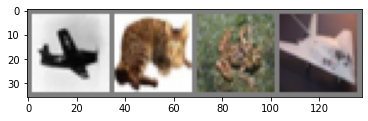

plane   cat  frog plane


In [7]:
def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))

In [11]:
class Net(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(3, 6, 5)
    self.pool = nn.MaxPool2d(2, 2)
    self.conv2 = nn.Conv2d(6, 16, 5)
    self.fc1 = nn.Linear(16 * 5 * 5, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)

  def forward(self, x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x = x.view(-1, 16 * 5 * 5)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

In [12]:
net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [15]:
for epoch in range(10):
  running_loss = 0.0
  for i, data in enumerate(trainloader, 0):
    inputs, labels = data

    optimizer.zero_grad()

    outputs = net(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    running_loss += loss.item()
    if i % 2000 == 1999:
        print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 2000))
        running_loss = 0.0

[1,  2000] loss: 1.247
[1,  4000] loss: 1.230
[1,  6000] loss: 1.229
[1,  8000] loss: 1.185
[1, 10000] loss: 1.217
[1, 12000] loss: 1.216
[2,  2000] loss: 1.126
[2,  4000] loss: 1.127
[2,  6000] loss: 1.135
[2,  8000] loss: 1.135
[2, 10000] loss: 1.121
[2, 12000] loss: 1.110
[3,  2000] loss: 1.059
[3,  4000] loss: 1.039
[3,  6000] loss: 1.048
[3,  8000] loss: 1.050
[3, 10000] loss: 1.069
[3, 12000] loss: 1.047
[4,  2000] loss: 0.975
[4,  4000] loss: 0.977
[4,  6000] loss: 0.996
[4,  8000] loss: 1.001
[4, 10000] loss: 1.021
[4, 12000] loss: 1.021
[5,  2000] loss: 0.907
[5,  4000] loss: 0.929
[5,  6000] loss: 0.967
[5,  8000] loss: 0.946
[5, 10000] loss: 0.987
[5, 12000] loss: 0.980
[6,  2000] loss: 0.885
[6,  4000] loss: 0.889
[6,  6000] loss: 0.932
[6,  8000] loss: 0.919
[6, 10000] loss: 0.923
[6, 12000] loss: 0.937
[7,  2000] loss: 0.834
[7,  4000] loss: 0.856
[7,  6000] loss: 0.859
[7,  8000] loss: 0.890
[7, 10000] loss: 0.904
[7, 12000] loss: 0.913
[8,  2000] loss: 0.799
[8,  4000] 

In [17]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
  for data in testloader:
    images, labels = data
    outputs = net(images)
    _, predicted = torch.max(outputs, 1)
    c = (predicted == labels).squeeze()
    for i in range(4):
      label = labels[i]
      class_correct[label] += c[i].item()
      class_total[label] += 1

for i in range(10):
  print('Accuracy of %5s : %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 69 %
Accuracy of   car : 72 %
Accuracy of  bird : 49 %
Accuracy of   cat : 49 %
Accuracy of  deer : 67 %
Accuracy of   dog : 34 %
Accuracy of  frog : 71 %
Accuracy of horse : 60 %
Accuracy of  ship : 80 %
Accuracy of truck : 69 %
